In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
starbucks = pd.read_csv('../data/starbucks.csv')

In [4]:
starbucks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [69]:
Beverage_grouped = starbucks.drop_duplicates().groupby('Beverage_category')['Beverage'].apply(set).reset_index()
Beverage_grouped

,Beverage_category,Beverage
0,Classic Espresso Drinks,"{Vanilla Latte (Or Other Flavoured Latte), Caf..."
1,Coffee,{Brewed Coffee}
2,Frappuccino® Blended Coffee,"{Coffee, Caramel (Without Whipped Cream), Java..."
3,Frappuccino® Blended Crème,"{Strawberries & Crème (Without Whipped Cream),..."
4,Frappuccino® Light Blended Coffee,"{Coffee, Mocha, Java Chip, Caramel}"
5,Shaken Iced Beverages,{Iced Brewed Coffee (With Milk & Classic Syrup...
6,Signature Espresso Drinks,{White Chocolate Mocha (Without Whipped Cream)...
7,Smoothies,"{Banana Chocolate Smoothie, Orange Mango Banan..."
8,Tazo® Tea Drinks,{Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibo...


##Barplots

Comparing categorical data. 

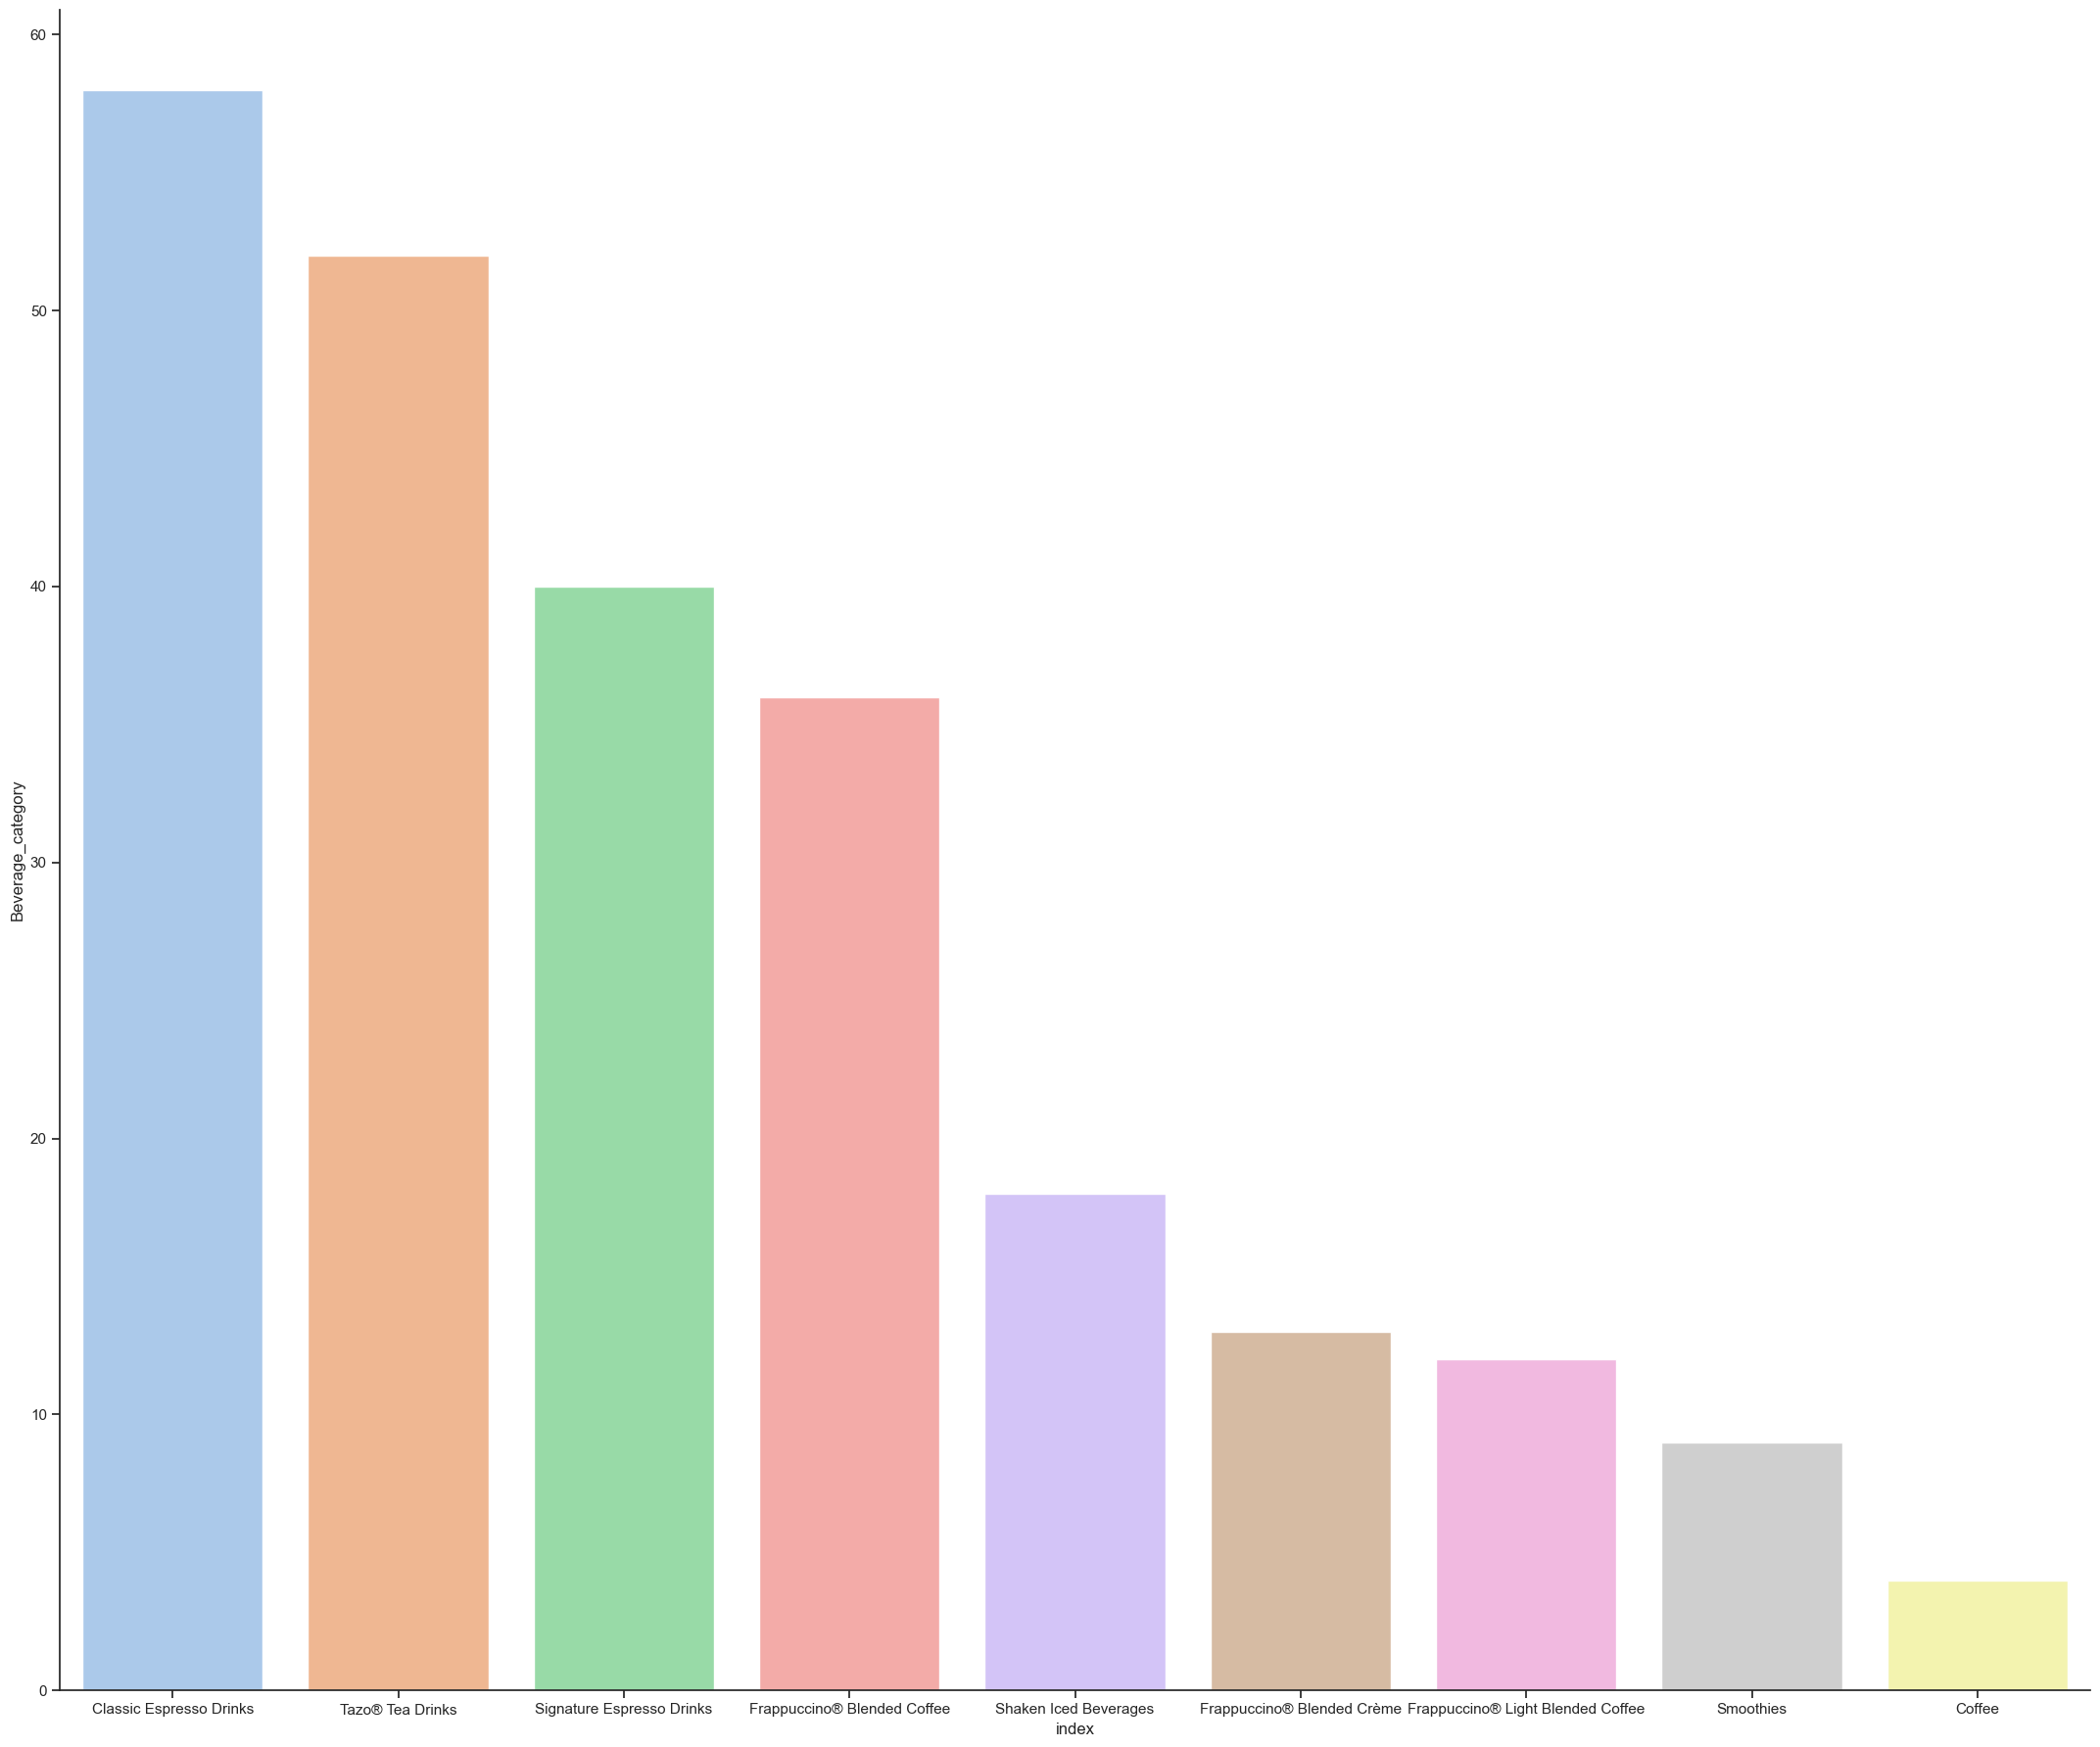

In [76]:
Top_drinks = starbucks['Beverage_category'].value_counts().reset_index().head(10)

sns.set_theme(style="ticks", palette="pastel")

sns.catplot(data=Top_drinks, x="index", y="Beverage_category", kind="bar", height=18, aspect=1.2)

- The previous plot show the count of the drinks most sell in Starbucks, the type of plot is a bar plot, which is helpful to see the different categories of drinks and the frequency in which those drinks are ordered. 

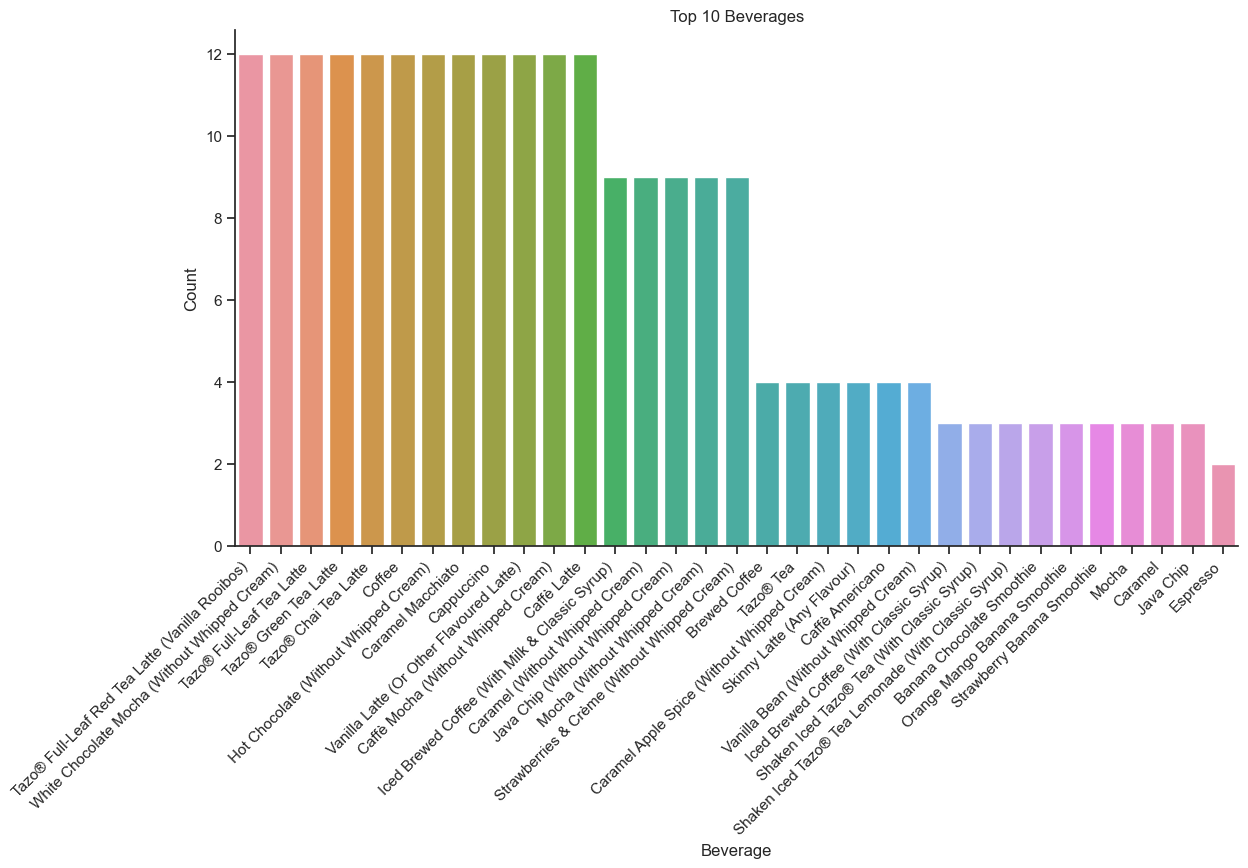

In [74]:
# Assuming your DataFrame is named starbucks
Top_Beverage = starbucks['Beverage'].value_counts().reset_index()

sns.set_theme(style="ticks", palette="pastel")

# Use x="index" and y="Beverage"
ax = sns.catplot(data=Top_Beverage, x="index", y="Beverage", kind="bar", height=6, aspect=2)

# Rotate x-axis labels
ax.set_xticklabels(rotation=45, ha="right")

# Set plot labels and titles
plt.xlabel("Beverage")
plt.ylabel("Count")
plt.title("Top 10 Beverages")

# Show the plot
plt.show()

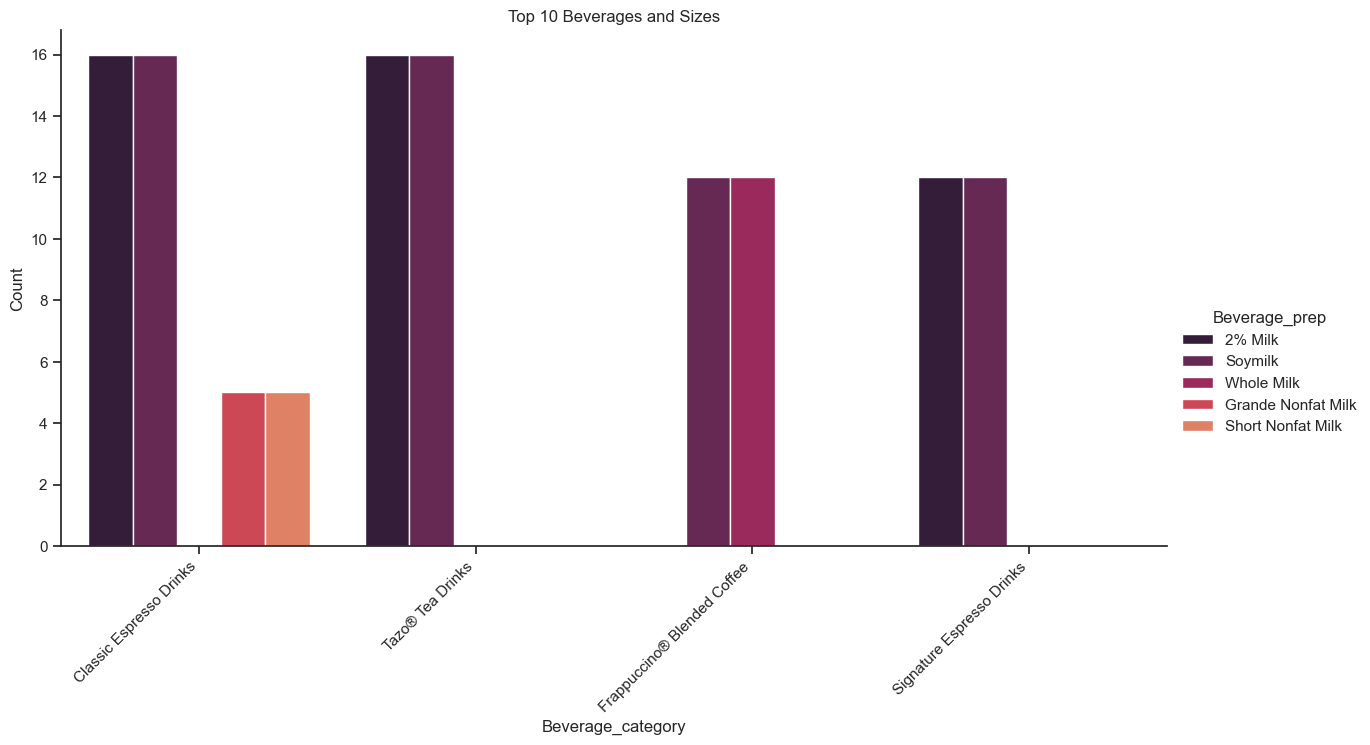

In [97]:
#Comparing the difference between types of coffee and its category.

Type_drink = starbucks.groupby(['Beverage_category', 'Beverage_prep']).size().reset_index(name='Count')

Type_drink = Type_drink.sort_values(by='Count', ascending=False).head(10)

sns.set_theme(style="ticks", palette="rocket")

# Use x="Beverage" and y="Count"
ax = sns.catplot(data=Type_drink, x="Beverage_category", y="Count", hue="Beverage_prep", kind="bar", height=6, aspect=2)
# Rotate x-axis labels
ax.set_xticklabels(rotation=45, ha="right")

# Set plot labels and titles
plt.xlabel("Beverage_category")
plt.ylabel("Count")
plt.title("Top 10 Beverages and Sizes")

# Show the plot
plt.show()

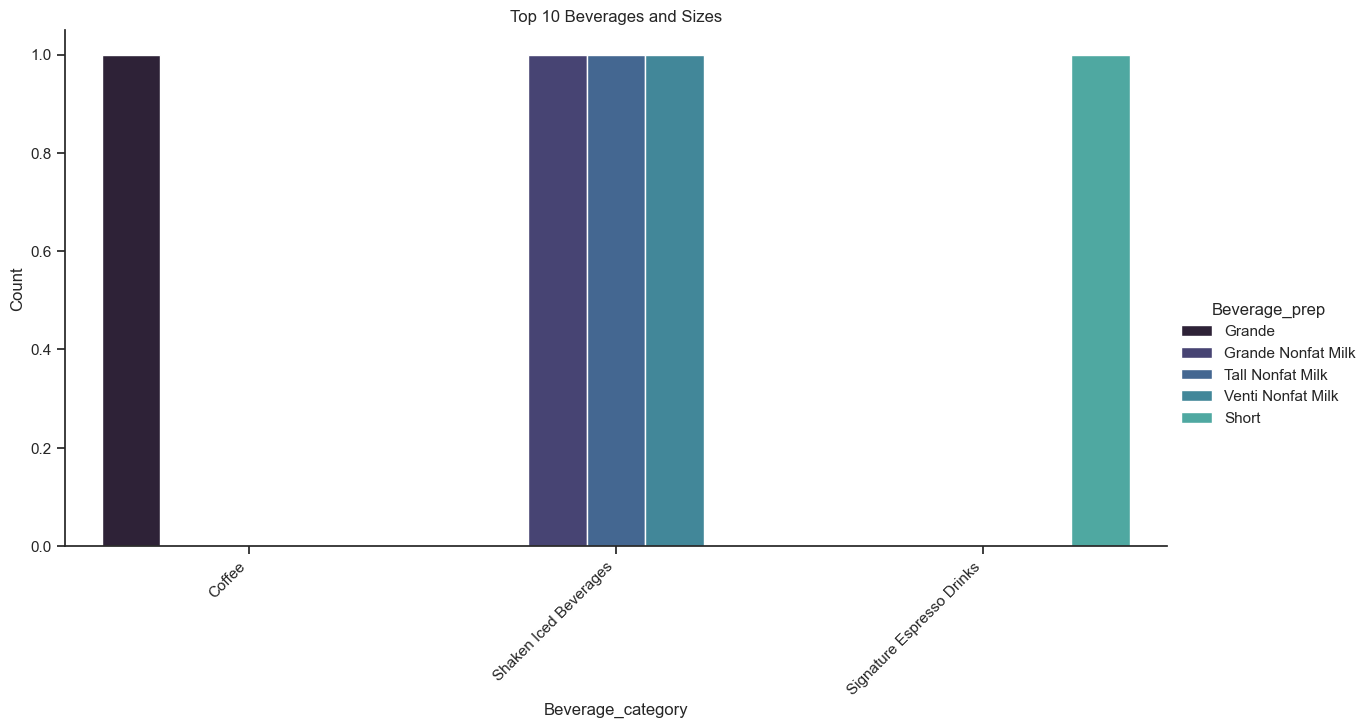

In [110]:
Type_drink = starbucks.groupby(['Beverage_category', 'Beverage_prep']).size().reset_index(name='Count')

Type_drink = Type_drink.sort_values(by='Count', ascending=False).tail()

sns.set_theme(style="ticks", palette="mako")

# Use x="Beverage" and y="Count"
ax = sns.catplot(data=Type_drink, x="Beverage_category", y="Count", hue="Beverage_prep", kind="bar", height=6, aspect=2)
# Rotate x-axis labels
ax.set_xticklabels(rotation=45, ha="right")

# Set plot labels and titles
plt.xlabel("Beverage_category")
plt.ylabel("Count")
plt.title("Top 10 Beverages and Sizes")

# Show the plot
plt.show()

Same distribution shown in piecharts. 

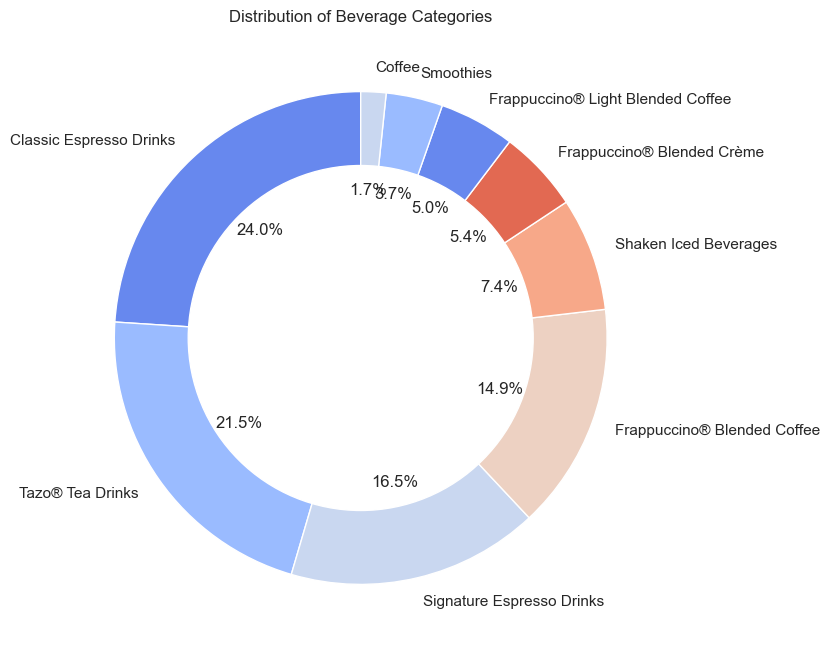

In [113]:
plt.figure(figsize=(8, 8))
category_counts = starbucks['Beverage_category'].value_counts()
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm'))
plt.title('Distribution of Beverage Categories')
plt.ylabel('')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

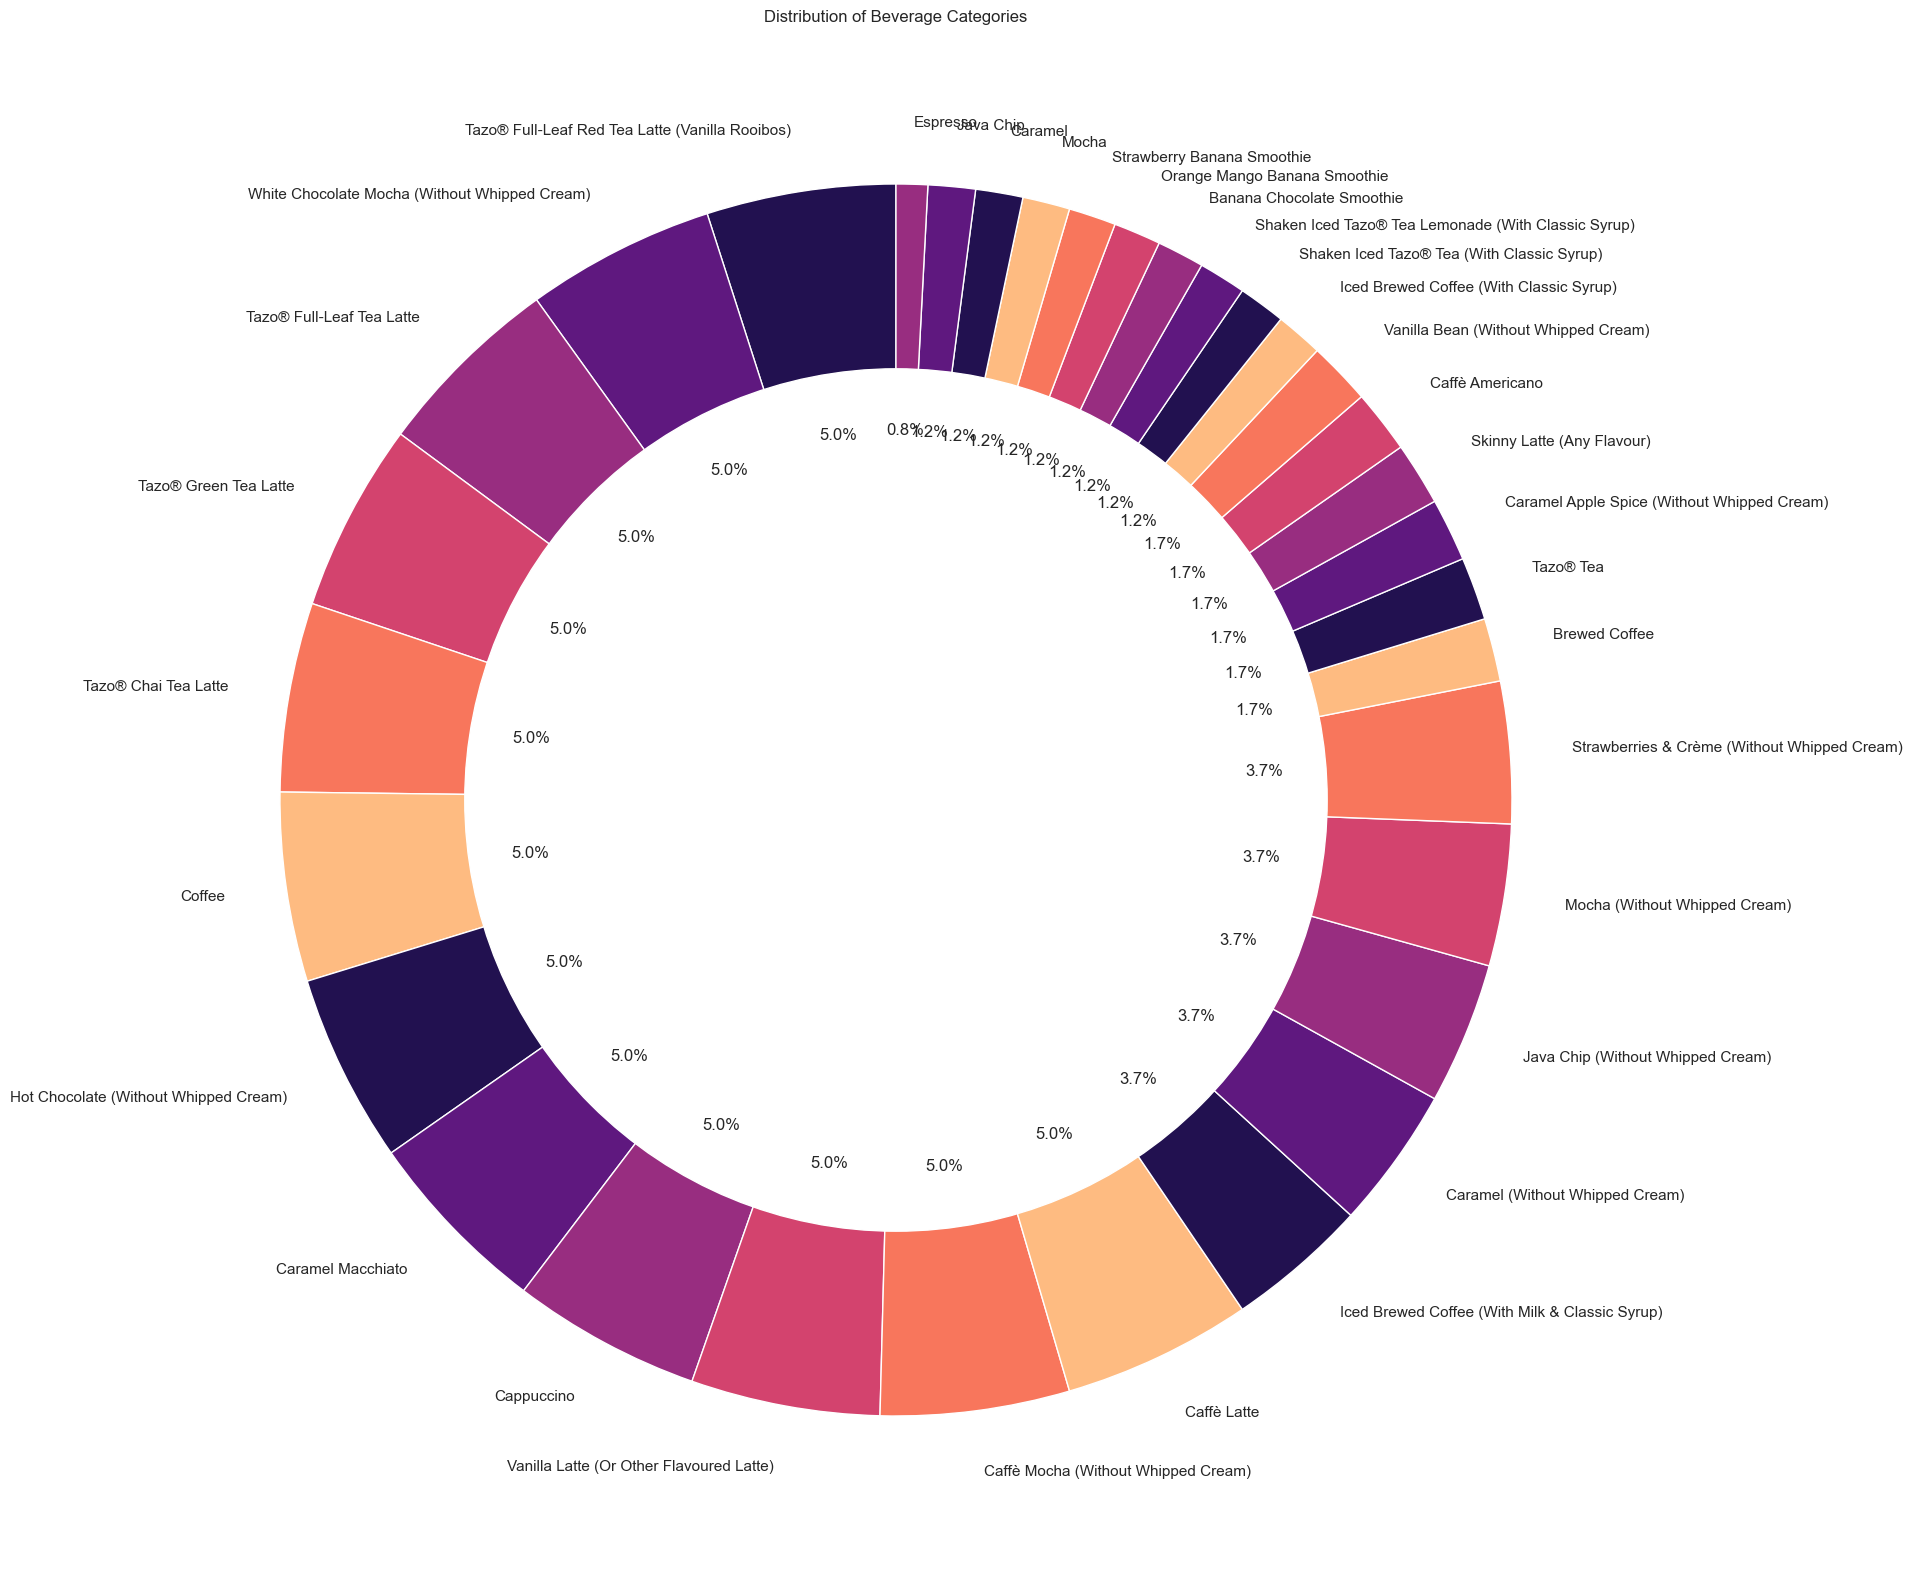

In [118]:
plt.figure(figsize=(20, 20))
category_counts = starbucks['Beverage'].value_counts()
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('magma'))
plt.title('Distribution of Beverage Categories')
plt.ylabel('')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()